# Classification of Framingham dataset using Logistic Regression
## Importing Packages that shall be used in this program
# sklearn:
Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language.[2] It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy
# pandas:
pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.


# matplotlib and ggplot:
matplotlib and ggplot are plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+. There is also a procedural "pylab" interface based on a state machine (like OpenGL), designed to closely resemble that of MATLAB, though its use is discouraged.[2] SciPy makes use of matplotlib.



In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier


# Framingham Dataset:

The Framingham Heart Study is a long-term, ongoing cardiovascular cohort study on residents of the town of Framingham, Massachusetts. The study began in 1948 with 5,209 adult subjects from Framingham, and is now on its third generation of participants.[1] Prior to it almost nothing was known about the "epidemiology of hypertensive or arteriosclerotic 
cardiovascular disease".[2] Much of the now-common knowledge concerning heart disease, such as the effects of diet, exercise, and common medications such as aspirin, is based on this longitudinal study. It is a project of the National Heart, Lung, and Blood Institute, in collaboration with (since 1971) Boston University.[1] Various health professionals from the hospitals and universities of Greater Boston staff the project. It has below mentioned attributes:

1) Male

2) Age

3) Education

4) currentSmoker

5) BPMeds

6) prevalentStroke

7) diabetes

8) totChol

9) diaBP

10) BMI

11) heartRate

12) glucose

13) TenYearCHD: In next 10 years if a person is prone to heart attache or not


In [2]:
df = pd.read_csv('framingham.csv')
df.dropna()
df = df._get_numeric_data() #drop non-numeric cols

X=df.ix[:,0:15]
Y=df.ix[:,15:16]
df.head()




c:\users\tarun.rao\appdata\local\continuumv1\anaconda3.1\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Label
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


## Correlation plot for the data set

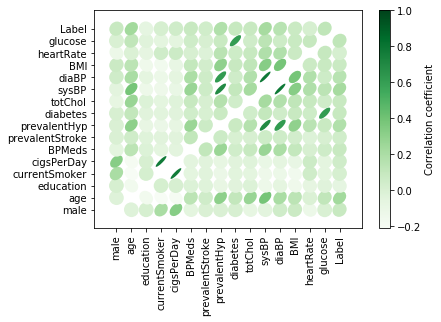

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.collections import EllipseCollection

def plot_corr_ellipses(data, ax=None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec


data = df.corr()
fig, ax = plt.subplots(1, 1)
m = plot_corr_ellipses(data, ax=ax, cmap='Greens')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.margins(0.1)

plt.show()

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)



### Implement Logistic Regression Model

In [5]:
dt_reg = RandomForestClassifier(max_depth=2, random_state=0)
dt_reg.fit(x_train,y_train)

c:\users\tarun.rao\appdata\local\continuumv1\anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Predict values using trained model

In [6]:
a=dt_reg.predict(x_test)


## Print confusion matrix and classification report

If a classification system has been trained to distinguish between cats, dogs and rabbits, a confusion matrix will summarize the results of testing the algorithm for further inspection. Assuming a sample of 27 animals — 8 cats, 6 dogs, and 13 rabbits, the resulting confusion matrix could look like the table below:

<img src="confusionmatrix.png">
     

In this confusion matrix, of the 8 actual cats, the system predicted that three were dogs, and of the six dogs, it predicted that one was a rabbit and two were cats. We can see from the matrix that the system in question has trouble distinguishing between cats and dogs, but can make the distinction between rabbits and other types of animals pretty well. All correct guesses are located in the diagonal of the table, so it's easy to visually inspect the table for errors, as they will be represented by values outside the diagonal.

In [7]:

cm= confusion_matrix(y_test, a)

print(cm)




[[629   0]
 [103   0]]


## Print accuracy

In [8]:
print("accuracy on test set: {:.3f}".format(dt_reg.score(x_test,y_test)))

accuracy on test set: 0.859


### Model Iteration
### Dropping features have multicolinearity

In [9]:
del df['sysBP']
del df['cigsPerDay']
del df['glucose']

del df['prevalentHyp']



X=df.ix[:,0:11]
Y=df.ix[:,11:12]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)
df.head()

,male,age,education,currentSmoker,BPMeds,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,Label
0,1,39,4,0,0,0,0,195,70.0,26.97,80,0
1,0,46,2,0,0,0,0,250,81.0,28.73,95,0
2,1,48,1,1,0,0,0,245,80.0,25.34,75,0
3,0,61,3,1,0,0,0,225,95.0,28.58,65,1
4,0,46,3,1,0,0,0,285,84.0,23.10,85,0


## Retraining the model with modified dataset

In [11]:
dt_reg = RandomForestClassifier(max_depth=2, random_state=0)
dt_reg.fit(x_train,y_train)

c:\users\tarun.rao\appdata\local\continuumv1\anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Predict the label with new model

In [12]:
a=dt_reg.predict(x_test)

## Print confusion matrix

In [13]:
cm= confusion_matrix(y_test, a)
print(cm)

[[629   0]
 [103   0]]


## Print accuracy for the new model
It can be observed that accruacy has improved compared to earlier model after removing features with multicolinearity

In [14]:

print("accuracy on test set: {:.3f}".format(dt_reg.score(x_test,y_test)))

accuracy on test set: 0.859
